In [1]:
import warnings;
warnings.simplefilter('ignore')


In [2]:
pip install pystan fbprophet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import json
from fbprophet import Prophet
# importing the requests library 
import requests 
  
# api-endpoint 
URL = "https://coronavirusapi-france.now.sh/AllDataByDepartement?Departement=Bas-Rhin"
  
# location given here 
location = "delhi technological university"
  
# defining a params dict for the parameters to be sent to the API 
PARAMS = {'address':location} 
  
# sending get request and saving the response as response object 
r = requests.get(url = URL) 
  
# extracting data in json format 
data = r.json() 
  
df = pd.json_normalize(data['allDataByDepartement'])
basrhin = df
csvd= basrhin.to_csv('new.csv',index=False)

df = pd.read_csv('new.csv')


In [4]:
df = pd.read_csv('new.csv')

In [5]:
df.head()

,date,sourceType,casConfirmes,code,nom,source.nom,source.url,deces,victimes,source.archive,hospitalises,reanimation,gueris,nouvellesHospitalisations,nouvellesReanimations
0,2020-02-27,lperez31-historical-data,1.0,DEP-67,Bas-Rhin,Coronavirus-France-Dataset,https://github.com/lperez31/coronavirus-france...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-02,agences-regionales-sante,2.0,DEP-67,Bas-Rhin,ARS Grand Est,https://www.grand-est.ars.sante.fr/system/file...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,agences-regionales-sante,5.0,DEP-67,Bas-Rhin,ARS Grand Est,https://www.grand-est.ars.sante.fr/system/file...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-07,lperez31-historical-data,46.0,DEP-67,Bas-Rhin,Coronavirus-France-Dataset,https://github.com/lperez31/coronavirus-france...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-08,agences-regionales-sante,46.0,DEP-67,Bas-Rhin,ARS Grand Est,https://www.grand-est.ars.sante.fr/system/file...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df1 = df[['date', 'nouvellesHospitalisations']]
df1.columns = ['ds', 'y']
df1.head()

,ds,y
0,2020-02-27,NaN
1,2020-03-02,NaN
2,2020-03-04,NaN
3,2020-03-07,NaN
4,2020-03-08,NaN


In [7]:
m = Prophet(interval_width=0.95, daily_seasonality=True, yearly_seasonality=True)
model = m.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [8]:
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-27,143.171638,61.632158,106.598506,143.171638,143.171638,-58.447574,-58.447574,-58.447574,-85.491731,...,2.642885,2.642885,2.642885,24.401272,24.401272,24.401272,0.0,0.0,0.0,84.724064
1,2020-03-02,142.461134,57.433677,104.344397,142.461134,142.461134,-61.694748,-61.694748,-61.694748,-85.491731,...,0.399626,0.399626,0.399626,23.397357,23.397357,23.397357,0.0,0.0,0.0,80.766385
2,2020-03-04,142.105881,61.180628,106.121039,142.105881,142.105881,-58.276739,-58.276739,-58.276739,-85.491731,...,3.876118,3.876118,3.876118,23.338874,23.338874,23.338874,0.0,0.0,0.0,83.829142
3,2020-03-07,141.573003,49.925112,96.360472,141.573003,141.573003,-66.379927,-66.379927,-66.379927,-85.491731,...,-5.104322,-5.104322,-5.104322,24.216126,24.216126,24.216126,0.0,0.0,0.0,75.193076
4,2020-03-08,141.395377,48.164388,93.878702,141.395377,141.395377,-69.798693,-69.798693,-69.798693,-85.491731,...,-9.131404,-9.131404,-9.131404,24.824443,24.824443,24.824443,0.0,0.0,0.0,71.596684


In [9]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
736,2022-03-11,11.195454,-68.716190,-22.271251,11.195433,11.195474,-56.203703,-56.203703,-56.203703,-85.491731,...,2.173054,2.173054,2.173054,27.114975,27.114975,27.114975,0.0,0.0,0.0,-45.008249
737,2022-03-12,11.017828,-74.385894,-28.797759,11.017806,11.017848,-62.254541,-62.254541,-62.254541,-85.491731,...,-5.104322,-5.104322,-5.104322,28.341513,28.341513,28.341513,0.0,0.0,0.0,-51.236713
738,2022-03-13,10.840202,-76.112275,-33.358873,10.840180,10.840222,-64.885709,-64.885709,-64.885709,-85.491731,...,-9.131404,-9.131404,-9.131404,29.737427,29.737427,29.737427,0.0,0.0,0.0,-54.045507
739,2022-03-14,10.662576,-64.145336,-21.247538,10.662554,10.662596,-53.801235,-53.801235,-53.801235,-85.491731,...,0.399626,0.399626,0.399626,31.290870,31.290870,31.290870,0.0,0.0,0.0,-43.138660
740,2022-03-15,10.484950,-60.601254,-12.786505,10.484928,10.484970,-47.362488,-47.362488,-47.362488,-85.491731,...,5.144042,5.144042,5.144042,32.985202,32.985202,32.985202,0.0,0.0,0.0,-36.877538


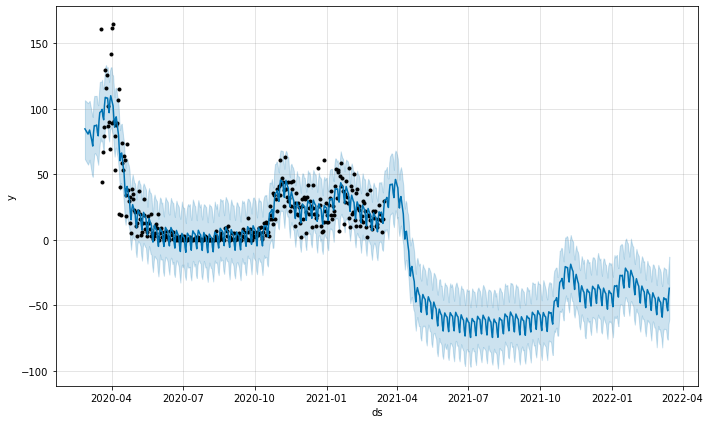

In [10]:
plot1 = m.plot(forecast)

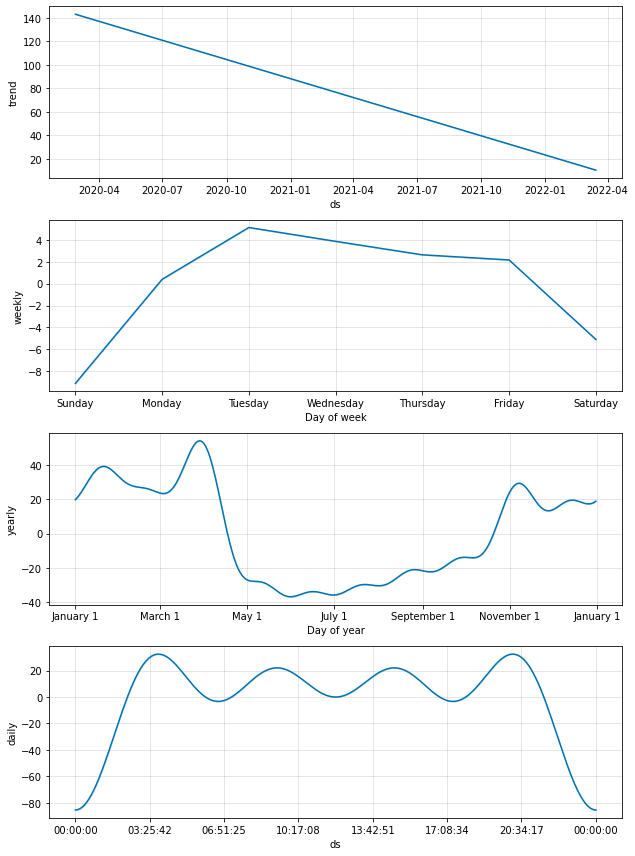

In [11]:
plot2 = m.plot_components(forecast)